[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/open-atmos/PySDM-examples/blob/main/PySDM_examples/Merlivat_and_Nief_1967/fig_2.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM-examples.git/main?urlpath=PySDM_examples/Merlivat_and_Nief_1967/fig_2.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM-examples/blob/main/PySDM_examples/Merlivat_and_Nief_1967/fig_2.ipynb)

### based on Fig. 2 from Merlivat and Nief 1967 (Tellus) "_Fractionnement isotopique lors des changements d’état solide-vapeur et liquide-vapeur de l’eau à des températures inférieures à 0°C_" (https://doi.org/10.3402/tellusa.v19i1.9756)

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
from open_atmos_jupyter_utils import show_plot
from matplotlib import pyplot
from PySDM import Formulae
from PySDM.physics import si
import numpy as np

In [3]:
formulae = Formulae()
alphas = formulae.isotope_equilibrium_fractionation_factors
const = formulae.constants

In [4]:
N_POINTS = 64

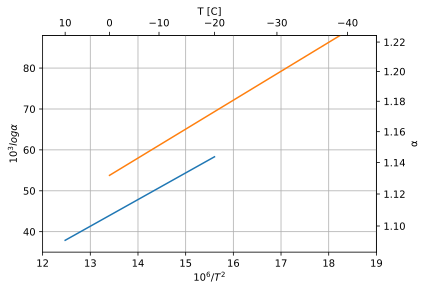

HTML(value="<a href='./fig_2.pdf' target='_blank'>./fig_2.pdf</a><br>")

In [5]:
def trans_x(TC):
    x = 1e6 / (TC + const.T0)**2
    return x

def trans_x_inv(x):
    TK = 1 / np.sqrt(x / 1e6)
    return TK - const.T0

def trans_y(alpha):
    y = 1e3 * np.log10(np.where(alpha > 0, alpha, np.nan))
    return y
    
def trans_y_inv(y):
    alpha = 10**(y / 1e3)
    return alpha

line_1_TC = np.linspace(10*si.K, -20*si.K, N_POINTS)
pyplot.plot(trans_x(line_1_TC), trans_y(alphas.alpha_l_HDO(line_1_TC + const.T0)))

line_2_TC = np.linspace(0*si.K, -40*si.K, N_POINTS)
pyplot.plot(trans_x(line_2_TC), trans_y(alphas.alpha_i_HDO(line_2_TC + const.T0)))

pyplot.grid()
pyplot.xlabel("$10^6/T^2$")
pyplot.ylabel("$10^3 logα$")
pyplot.xlim(12, 19)
pyplot.ylim(35, 88)

twinx = pyplot.gca().secondary_yaxis('right', functions=(trans_y_inv, trans_y))
twinx.set_ylabel("α")

twiny = pyplot.gca().secondary_xaxis('top', functions=(trans_x_inv, trans_x))
twiny.set_xlabel("T [C]")

show_plot("fig_2.pdf")